In [11]:
# Instalación de librerías
!pip install pandas matplotlib seaborn statsmodels


### Cargar las bibliotecas necesarias

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## SUMMARY OF THIS DOCUMENT
#### In this document we have loaded the data of different shots on goal, which we have divided between the women's and men's leagues. We have made a number of basic checks to begin to draw conclusions.

### LOADING DATA

In [15]:
# Women's leagues
xgot = pd.read_csv("Data/xgot.csv", delimiter=";", usecols=["Arriba/abajo", "X", "xGOT", "Gol (0/1)", "Altura", "Resultante\nde cada tiro"])
mi_dataframe = xgot[["Arriba/abajo", "X", "xGOT", "Gol (0/1)", "Altura", "Resultante\nde cada tiro"]]

# Men's leagues
xgot_m = pd.read_csv("Data/xgot_m.csv", delimiter=";", usecols=["Arriba/abajo", "zona", "xGOT", "Gol (0/1)", "Altura", "Resultante\nde cada tiro"])
mi_dataframe2 = xgot_m[["Arriba/abajo", "zona", "xGOT", "Gol (0/1)", "Altura", "Resultante\nde cada tiro"]]


### First of all, we have made a table to calculate the average of xGOT based on shot height.

In [16]:
# Women's leagues
media_xGOT_por_altura = mi_dataframe.groupby(["Arriba/abajo", "Gol (0/1)"]).agg(
    media_xGOT=('xGOT', 'mean'), varianza_XGOT=('xGOT', 'var')).reset_index()
print(media_xGOT_por_altura)

# Men's leagues
media_xGOT_por_altura2 = mi_dataframe2.groupby(["Arriba/abajo", "Gol (0/1)"]).agg(
    media_xGOT=('xGOT', 'mean'), varianza_XGOT=('xGOT', 'var')).reset_index()
print(media_xGOT_por_altura2)

  Arriba/abajo  Gol (0/1)  media_xGOT  varianza_XGOT
0        Abajo          0    0.186006       0.045842
1        Abajo          1    0.619653       0.090915
2       Arriba          0    0.207742       0.038222
3       Arriba          1    0.565526       0.070604
4      Arribaa          0    0.210000            NaN
  Arriba/abajo  Gol (0/1)  media_xGOT  varianza_XGOT
0        Abajo          0    0.208658       0.046042
1        Abajo          1    0.616857       0.084599
2       Arriba          0    0.187709       0.032965
3       Arriba          1    0.559390       0.087389


### Secondly, we calculate the mean and variance of xGOT for each league zone.

              X  Gol (0/1)  media_xGOT  varianza_XGOT
0   High centre          0    0.154783       0.037950
1   High centre          1    0.546667       0.093261
2     High left          0    0.212381       0.026619
3     High left          1    0.605294       0.052626
4    High right          0    0.261923       0.021496
5    High right          1    0.535000       0.080539
6    Low centre          0    0.128619       0.036474
7    Low centre          1    0.537273       0.118027
8      Low left          0    0.271757       0.055480
9      Low left          1    0.669623       0.078865
10    Low right          0    0.258406       0.047322
11    Low right          1    0.619298       0.084974


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2164\2307515212.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="X", y="media_xGOT", data=datos_filtrados, palette="viridis")


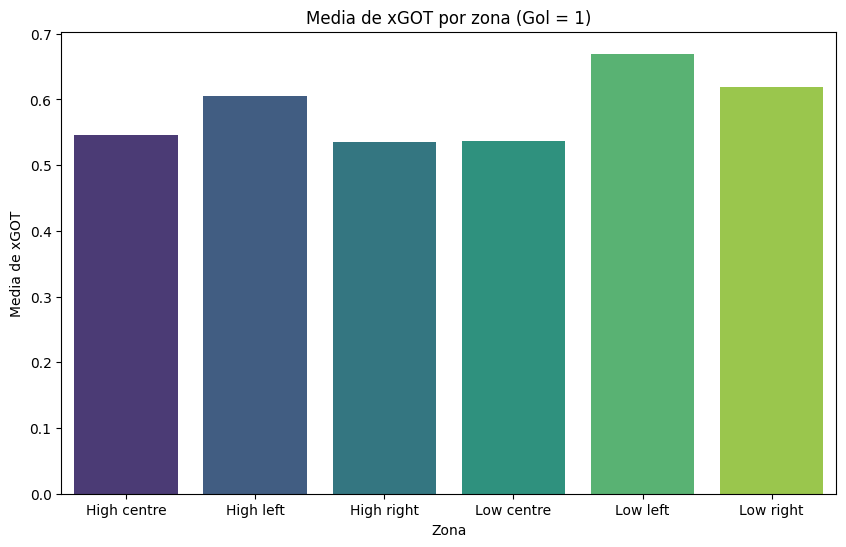

           zona  Gol (0/1)  media_xGOT  varianza_XGOT
0   High centre          0    0.117551       0.020425
1   High centre          1    0.578667       0.114612
2     High left          0    0.285952       0.035444
3     High left          1    0.635405       0.100442
4    High right          0    0.261842       0.036048
5    High right          1    0.471613       0.051487
6    Low centre          0    0.143151       0.039699
7    Low centre          1    0.553396       0.097577
8      Low left          0    0.273750       0.048664
9      Low left          1    0.655242       0.077947
10    Low right          0    0.261974       0.039840
11    Low right          1    0.600000       0.083289


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2164\2307515212.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="zona", y="media_xGOT", data=datos_filtrados2, palette="magma")


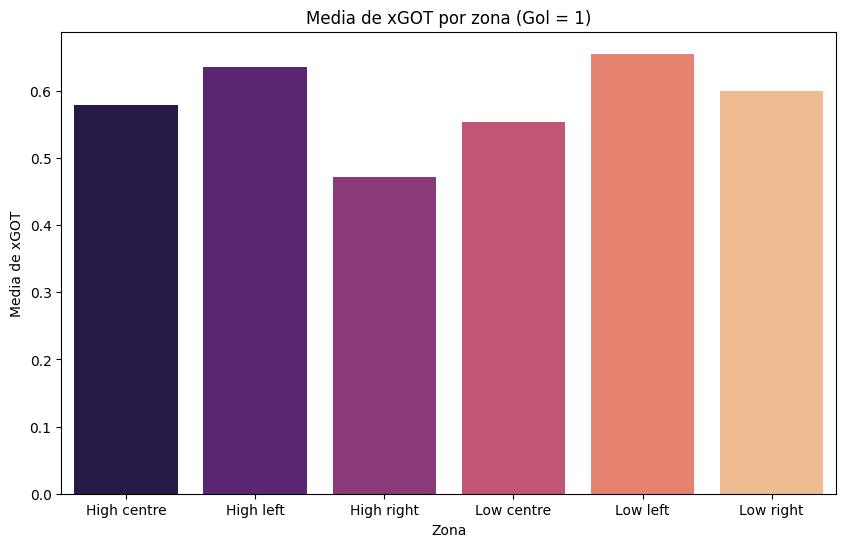

In [17]:
# Women's leagues
media_xGOT_por_zona = mi_dataframe.groupby(["X", "Gol (0/1)"]).agg(
    media_xGOT=('xGOT', 'mean'), varianza_XGOT=('xGOT', 'var')).reset_index()
print(media_xGOT_por_zona)

# Women's leagues Histogram
# Filter the value 'Gol (0/1)' == 1
datos_filtrados = media_xGOT_por_zona[media_xGOT_por_zona["Gol (0/1)"] == 1]

# Histogram generation
plt.figure(figsize=(10,6))
sns.barplot(x="X", y="media_xGOT", data=datos_filtrados, palette="viridis")
plt.title("Media de xGOT por zona (Gol = 1)")
plt.xlabel("Zona")
plt.ylabel("Media de xGOT")
plt.show()

# Men's leagues
media_xGOT_por_zona2 = mi_dataframe2.groupby(["zona", "Gol (0/1)"]).agg(
    media_xGOT=('xGOT', 'mean'), varianza_XGOT=('xGOT', 'var')).reset_index()
print(media_xGOT_por_zona2)

# Men's leagues Histogram
# Filter the value 'Gol (0/1)' == 1
datos_filtrados2 = media_xGOT_por_zona2[media_xGOT_por_zona2["Gol (0/1)"] == 1]

# Histogram generation
plt.figure(figsize=(10,6))
sns.barplot(x="zona", y="media_xGOT", data=datos_filtrados2, palette="magma")
plt.title("Media de xGOT por zona (Gol = 1)")
plt.xlabel("Zona")
plt.ylabel("Media de xGOT")
plt.show()

### Null hypothesis of the same medie testing with t.test function

In [18]:
# Women's Leagues
grupo1 = mi_dataframe["xGOT"]

# Men's Leagues
grupo2 = mi_dataframe2["xGOT"]

# T-test for means
t_test_result = stats.ttest_ind(grupo1.dropna(), grupo2.dropna())
print(t_test_result)

# F-test for variances
f_test_result = stats.levene(grupo1.dropna(), grupo2.dropna())
print(f_test_result)

TtestResult(statistic=-0.7752198560582397, pvalue=0.4383145539491613, df=1749.0)
LeveneResult(statistic=0.034663728433877834, pvalue=0.8523236481549168)


### Similar checks for the "Resultante" variable

In [19]:
# Women's leagues
media_resultante = mi_dataframe["Resultante\nde cada tiro"].mean()
print(media_resultante)

# Men's leagues
media_resultante2 = mi_dataframe2["Resultante\nde cada tiro"].mean()
print(media_resultante2)

-0.015108514190317194
-0.01598090277777778


### Average of the variable "Resultante" by height

In [20]:
# Women's leagues
media_resultante_por_altura = mi_dataframe.groupby(["Arriba/abajo", "Gol (0/1)"]).agg(
    media_Resultante=('Resultante\nde cada tiro', 'mean'), varianza_Resultante=('Resultante\nde cada tiro', 'var')).reset_index()
print(media_resultante_por_altura)

# Men's leagues
media_resultante_por_altura2 = mi_dataframe2.groupby(["Arriba/abajo", "Gol (0/1)"]).agg(
    media_Resultante=('Resultante\nde cada tiro', 'mean'), varianza_Resultante=('Resultante\nde cada tiro', 'var')).reset_index()
print(media_resultante_por_altura2)

  Arriba/abajo  Gol (0/1)  media_Resultante  varianza_Resultante
0        Abajo          0         -0.186687             0.045820
1        Abajo          1          0.380903             0.091494
2       Arriba          0         -0.213978             0.040359
3       Arriba          1          0.434474             0.070604
4      Arribaa          0         -0.210000                  NaN
  Arriba/abajo  Gol (0/1)  media_Resultante  varianza_Resultante
0        Abajo          0         -0.209853             0.046121
1        Abajo          1          0.383143             0.084599
2       Arriba          0         -0.187709             0.032965
3       Arriba          1          0.440610             0.087389


### Average of the variable "Resultante" by zone

In [21]:
# Women's leagues
media_resultante_por_zona = mi_dataframe.groupby(["X", "Gol (0/1)"]).agg(
    media_Resultante=('Resultante\nde cada tiro', 'mean'), varianza_Resultante=('Resultante\nde cada tiro', 'var')).reset_index()
print(media_resultante_por_zona)

# Men's leagues
media_resultante_por_zona2 = mi_dataframe2.groupby(["zona", "Gol (0/1)"]).agg(
    media_Resultante=('Resultante\nde cada tiro', 'mean'), varianza_Resultante=('Resultante\nde cada tiro', 'var')).reset_index()
print(media_resultante_por_zona2)

              X  Gol (0/1)  media_Resultante  varianza_Resultante
0   High centre          0         -0.167826             0.043515
1   High centre          1          0.453333             0.093261
2     High left          0         -0.212381             0.026619
3     High left          1          0.394706             0.052626
4    High right          0         -0.261154             0.021803
5    High right          1          0.465000             0.080539
6    Low centre          0         -0.129834             0.036574
7    Low centre          1          0.463030             0.118309
8      Low left          0         -0.271757             0.055480
9      Low left          1          0.330377             0.078865
10    Low right          0         -0.258406             0.047322
11    Low right          1          0.381930             0.086259
           zona  Gol (0/1)  media_Resultante  varianza_Resultante
0   High centre          0         -0.117551             0.020425
1   High c

### Null hypothesis of the same medie testing with t.test function

In [22]:
# Women's leagues
grupo1_r = mi_dataframe["Resultante\nde cada tiro"]

# Men's leagues
grupo2_r = mi_dataframe2["Resultante\nde cada tiro"]

# T-test for means of "Resultante"
t_test_result_r = stats.ttest_ind(grupo1_r.dropna(), grupo2_r.dropna())
print(t_test_result_r)

# F-test for variances of "Resultante"
f_test_result_r = stats.levene(grupo1_r.dropna(), grupo2_r.dropna())
print(f_test_result_r)


TtestResult(statistic=0.04752235171940565, pvalue=0.9621023419450729, df=1749.0)
LeveneResult(statistic=0.5674579968207115, pvalue=0.45137219929222316)
